In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [32]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [33]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/Flowers-Dataset/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4319 images belonging to 5 classes.


In [20]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/Flowers-Dataset/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",)

Found 4319 images belonging to 5 classes.


In [21]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [23]:
model=Sequential()

In [24]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [26]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 72s 402ms/step - loss: 0.7203 - accuracy: 0.7249 - val_loss: 0.7238 - val_accuracy: 0.7337
Epoch 2/10
180/180 [==============================] - 73s 407ms/step - loss: 0.6819 - accuracy: 0.7386 - val_loss: 0.6254 - val_accuracy: 0.7548
Epoch 3/10
180/180 [==============================] - 71s 394ms/step - loss: 0.6561 - accuracy: 0.7550 - val_loss: 0.8123 - val_accuracy: 0.6895
Epoch 4/10
180/180 [==============================] - 74s 410ms/step - loss: 0.6502 - accuracy: 0.7536 - val_loss: 0.5306 - val_accuracy: 0.8011
Epoch 5/10
180/180 [==============================] - 73s 407ms/step - loss: 0.6101 - accuracy: 0.7657 - val_loss: 0.5358 - val_accuracy: 0.8034
Epoch 6/10
180/180 [==============================] - 71s 395ms/step - loss: 0.6070 - accuracy: 0.7671 - val_loss: 0.5166 - val_accuracy: 0.8004
Epoch 7/10
180/180 [==============================] - 71s 392ms/step - loss: 0.5806 - accuracy: 0.7833 - val_loss: 0.5695 - val_ac

In [34]:
model.save('IBM_flowers.h5')

In [35]:
pwd

'/content'

In [36]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('IBM_flowers.h5')

In [38]:
img=image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/sunflower/1064662314_c5a7891b9f_m.jpg')

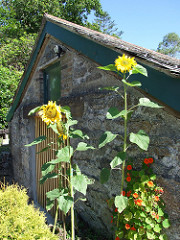

In [39]:
img

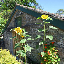

In [40]:
img=image.load_img(r'/content/drive/MyDrive/Flowers-Dataset/flowers/sunflower/1064662314_c5a7891b9f_m.jpg',target_size=(64,64))
img

In [41]:
x=image.img_to_array(img)
x

array([[[159., 182., 136.],
        [ 98., 104., 100.],
        [ 94.,  95., 149.],
        ...,
        [153., 203., 254.],
        [152., 202., 253.],
        [153., 203., 254.]],

       [[145., 173., 187.],
        [ 70.,  83.,  55.],
        [154., 166., 178.],
        ...,
        [159., 207., 255.],
        [158., 206., 254.],
        [157., 205., 253.]],

       [[123., 163.,  51.],
        [131., 187., 114.],
        [132., 150., 126.],
        ...,
        [163., 212., 253.],
        [161., 210., 251.],
        [158., 209., 252.]],

       ...,

       [[255., 255., 159.],
        [218., 223., 105.],
        [204., 203., 121.],
        ...,
        [ 86.,  86.,  74.],
        [ 98., 104.,  94.],
        [ 76.,  76.,  66.]],

       [[180., 191.,  87.],
        [224., 222.,  99.],
        [208., 199.,  96.],
        ...,
        [ 90.,  96.,  82.],
        [ 99., 108., 105.],
        [117., 123., 109.]],

       [[128., 134.,  74.],
        [239., 233., 145.],
        [114., 1

In [42]:
x=np.expand_dims(x,axis=0)
x

array([[[[159., 182., 136.],
         [ 98., 104., 100.],
         [ 94.,  95., 149.],
         ...,
         [153., 203., 254.],
         [152., 202., 253.],
         [153., 203., 254.]],

        [[145., 173., 187.],
         [ 70.,  83.,  55.],
         [154., 166., 178.],
         ...,
         [159., 207., 255.],
         [158., 206., 254.],
         [157., 205., 253.]],

        [[123., 163.,  51.],
         [131., 187., 114.],
         [132., 150., 126.],
         ...,
         [163., 212., 253.],
         [161., 210., 251.],
         [158., 209., 252.]],

        ...,

        [[255., 255., 159.],
         [218., 223., 105.],
         [204., 203., 121.],
         ...,
         [ 86.,  86.,  74.],
         [ 98., 104.,  94.],
         [ 76.,  76.,  66.]],

        [[180., 191.,  87.],
         [224., 222.,  99.],
         [208., 199.,  96.],
         ...,
         [ 90.,  96.,  82.],
         [ 99., 108., 105.],
         [117., 123., 109.]],

        [[128., 134.,  74.],
       

In [43]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 115ms/step


array([3])

In [44]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [45]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [46]:
index[y[0]]

'sunflower'